In [1]:
import numpy as np
import cv2 as cv
from cake import cake
from matplotlib import pyplot as plt
from cluster_half_shelfs_alpha import Half_shelf_cluster
from confectionery import Confectionery
from particle_data_structure import ParticleDataStruct

In [2]:
obj=np.load("data/obj_traj_1.npy")
image_stream=np.load("data/stream_string.npy")
koppenrath=Confectionery()
structured_datas=ParticleDataStruct(obj,image_stream,koppenrath)
data_3d=structured_datas.load_data_3d("data/particle_structured3d_1.npy")
data_flat=structured_datas.load_data_flat("data/particle_structured_flat_1.npy")
data_flat_effective=structured_datas.get_data_flatten_effective(11,data_flat)



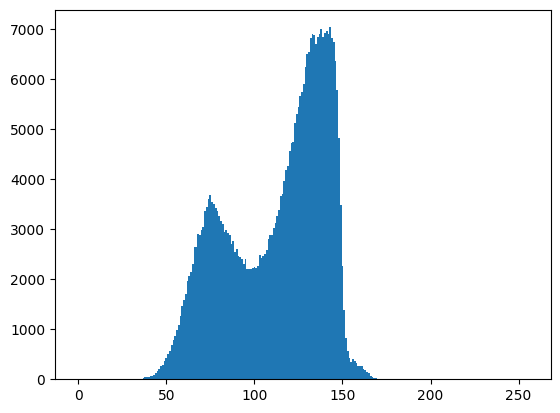

In [3]:
bins=np.arange(256+1)-0.5
n, bins, patches=plt.hist(data_flat_effective.flatten(),bins)
plt.show()

In [4]:
pmf=n/data_flat_effective.size
cmf=np.add.accumulate(pmf)
support=pmf>0
support=np.s_[(np.argwhere(support==1)[0][0]):(np.argwhere(support==1)[-1][0]+1)]

T=lambda r: (255*cmf[r]).astype(np.uint8)
r=data_flat_effective.flatten()
s=T(r)


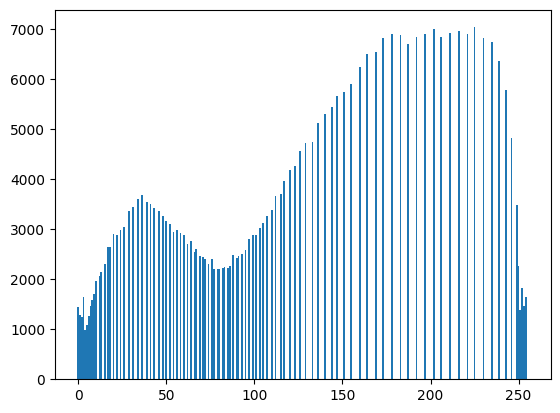

In [5]:
bins=np.arange(256+1)-0.5
n, bins, patches=plt.hist(s.flatten(),bins)
plt.show()

# show frame 15

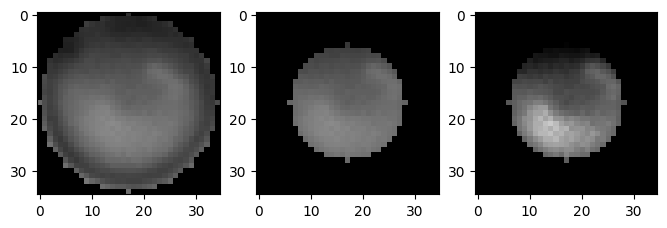

In [6]:
img=data_3d[15,:,:]
img_effective=np.copy(img)
img_effective[koppenrath.sell_cake(11,img.shape[0],img.shape[0])==0]=0
s=T(data_flat_effective[15,:])
s=s.reshape((-1,s.size))
s=structured_datas.data_flatten_effective_to_data_flat(11,s)
s=structured_datas.expand_data(s)
s=s[0,:,:]

fig = plt.figure(figsize=(8, 5))
ax=fig.add_subplot(1,3,1)
ax.imshow(img,cmap="gray",vmin=0,vmax=255)
ax=fig.add_subplot(1,3,2)
ax.imshow(img_effective,cmap="gray",vmin=0,vmax=255)
ax=fig.add_subplot(1,3,3)
ax.imshow(s,cmap="gray",vmin=0,vmax=255)
plt.show()

In [7]:
print(np.linalg.norm(img_effective-s))

486.29723420969606


In [8]:
backsub=cv.createBackgroundSubtractorMOG2(history=200, detectShadows=False)
cam = cv.VideoCapture("Video_Data/take_02.avi")
frame_count=0
while(True):
    # reading from frame
    ret,frame = cam.read()
    if frame is None or frame_count==500:
        break
    # if no video is left break or max frames is reached
    backsub.apply(cv.cvtColor(frame,cv.COLOR_BGR2GRAY))
    frame_count+=1
# Release all space and windows once done
cam.release()


In [9]:
image_shape=frame.shape
print(image_shape)

(2048, 2048, 3)


In [10]:
image_query=np.zeros((256,256))
for i in range(256):
    for j in range(256):
        image_query[i,j]=j
print(image_query.shape)
image_query=(np.kron(image_query,np.ones((8,8)))).astype(np.uint8)

(256, 256)


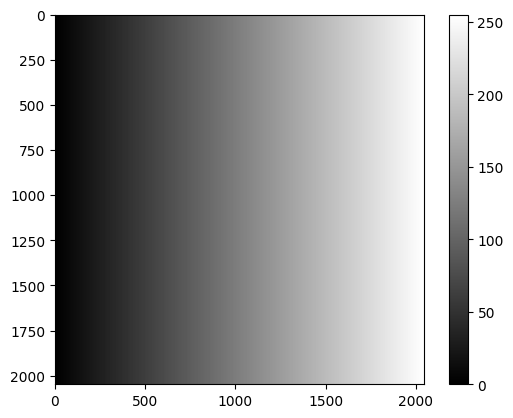

In [11]:
plt.figure()
plt.imshow(image_query,cmap="gray")
plt.colorbar()
plt.show()

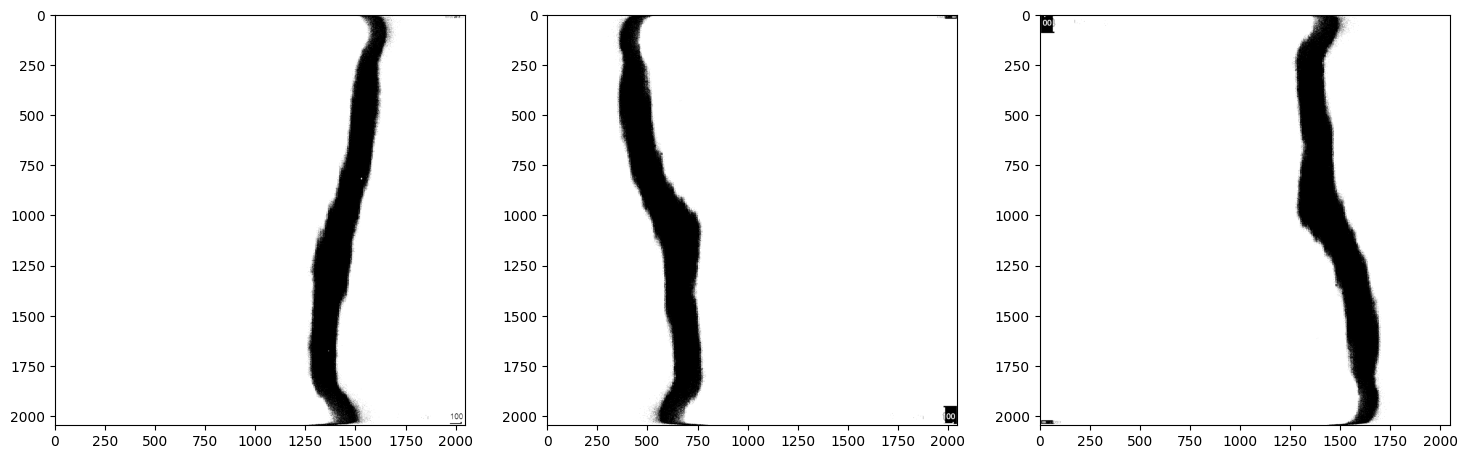

In [12]:
#image_query_bgr=cv.cvtColor(image_query,cv.COLOR_GRAY2BGR)
mask_1=backsub.apply(image_query, learningRate = 0 )
mask_2=backsub.apply(image_query[::-1,::-1], learningRate = 0 )

fig,ax=plt.subplots(1,3)
fig.set_figheight(8)
fig.set_figwidth(18)

ax[0].imshow(mask_1,cmap="gray")
ax[1].imshow(mask_2,cmap="gray")
ax[2].imshow(mask_2[::-1,::-1],cmap="gray")
plt.show()

In [20]:
num_roi,_=cv.findContours(np.zeros((500,500),dtype=np.uint8),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(cv.findContours(np.zeros((500,500),dtype=np.uint8),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE))
print(len(num_roi))
a=np.empty((0,3))
print(a)
print(cv.HoughCircles(np.zeros((500,500),dtype=np.uint8), cv.HOUGH_GRADIENT, dp=1, minDist=20))


((), None)
0
[]
None


In [25]:
print(type(None) is np.ndarray)

False


In [23]:
print(a.shape[0]==0)

False


In [29]:
a is None

False

In [64]:
circle_a=np.array([[1,2,1e10],[10,11,1e10]])
cicle_b=np.vstack((circle_a,circle_a-1))
circles_stream=[None,circle_a,cicle_b,None,circle_a]
frame_numb_offset=0
while True:
    if circles_stream[frame_numb_offset] is not None:
        break
    frame_numb_offset+=1
circles_current=circles_stream[frame_numb_offset][:,:-1]
# initialize matched objects
a=np.concatenate((frame_numb_offset*np.ones(circles_current.shape[0]).reshape((-1,1)),circles_current),axis=1)
matched_objects=dict(enumerate(a[:,np.newaxis,:]))
# initialize objects_ids to keep track
objects_ids_current=list(range(circles_current.shape[0]))

total_num_objects=np.array([circles_current.shape[0]])

In [67]:
from sklearn.metrics import pairwise_distances as pairwise_distances

In [68]:
print(matched_objects)
print(circles_stream)

{0: array([[1., 1., 2.]]), 1: array([[ 1., 10., 11.]])}
[None, array([[1.0e+00, 2.0e+00, 1.0e+10],
       [1.0e+01, 1.1e+01, 1.0e+10]]), array([[1.0e+00, 2.0e+00, 1.0e+10],
       [1.0e+01, 1.1e+01, 1.0e+10],
       [0.0e+00, 1.0e+00, 1.0e+10],
       [9.0e+00, 1.0e+01, 1.0e+10]]), None, array([[1.0e+00, 2.0e+00, 1.0e+10],
       [1.0e+01, 1.1e+01, 1.0e+10]])]


In [70]:
print(circles_stream[1])
print(circles_stream[2])

[[1.0e+00 2.0e+00 1.0e+10]
 [1.0e+01 1.1e+01 1.0e+10]]
[[1.0e+00 2.0e+00 1.0e+10]
 [1.0e+01 1.1e+01 1.0e+10]
 [0.0e+00 1.0e+00 1.0e+10]
 [9.0e+00 1.0e+01 1.0e+10]]


In [71]:
pairwise_distances(circles_stream[1][:,:-1],circles_stream[2][:,:-1])

array([[ 0.        , 12.72792206,  1.41421356, 11.3137085 ],
       [12.72792206,  0.        , 14.14213562,  1.41421356]])

In [63]:
for i in range(frame_numb_offset+1,len(circles_stream)-1):
    frame_numb_offset+=1
    if circles_stream[i] is not None:
        circles_current=circles_stream[i][:,:-1]
    if circles_stream[frame_numb_offset] is not None:
        circles_next=circles_stream[frame_numb_offset][:,:-1]
    if circles_stream[frame_numb_offset] is None:
        circles_current=None
        print("skip iteration:",i)
        continue
    diff = circles_current[:, np.newaxis] - circles_next[np.newaxis, :]
    squared_diff = np.square(diff)
    # Calculate the sum of squared differences along the last axis
    D = np.sqrt(np.sum(squared_diff, axis=-1))
    print("current_circle:",circles_current)
    print("next_circle:",circles_next)
    print("distance",D)

current_circle: [[ 1.  2.]
 [10. 11.]
 [ 0.  1.]
 [ 9. 10.]]
next_circle: [[ 1.  2.]
 [10. 11.]
 [ 0.  1.]
 [ 9. 10.]]
distance [[ 0.         12.72792206  1.41421356 11.3137085 ]
 [12.72792206  0.         14.14213562  1.41421356]
 [ 1.41421356 14.14213562  0.         12.72792206]
 [11.3137085   1.41421356 12.72792206  0.        ]]
skip iteration: 3


In [74]:
import numpy as np

cost = np.array([[4, 1, 3,5], [2, 0, 5,2], [3, 2, 2,1]])

from scipy.optimize import linear_sum_assignment

row_ind, col_ind = linear_sum_assignment(cost)

In [75]:
print(cost)

[[4 1 3 5]
 [2 0 5 2]
 [3 2 2 1]]


In [76]:
print(col_ind)

[1 0 3]


In [80]:
a=[]

In [81]:
a.extend(list(range(5,10)))
a

[5, 6, 7, 8, 9]